In [8]:
import csv
import requests
import os

In [2]:
file_path = 'data/230130_gymbet.csv'

dic = {}
with open(file_path, "r", encoding='UTF-8') as csv_file:
    csvreader = csv.reader(csv_file, delimiter=",", quotechar='"')
    next(csvreader)
    for row in csvreader:
        user_id = row[0]
        start_time = row[1]
        data_url = row[5]
        
        if user_id in dic:
            dic[user_id] += 1
        else:
            dic[user_id] = 0
        
        file_name = user_id + '_' + str(dic[user_id]) + '.txt'
        
        txt_path = 'data/' + file_name
        
        response = requests.get(data_url)
        
        with open(txt_path, "w", encoding='UTF-8') as text_file:
            text_file.write(response.text)

In [9]:
x_arr = []
y_arr = []
for f_name in os.listdir('data'):
    if f_name.endswith('.txt'):
        file_path = 'data/' + f_name
        
        user = f_name.split('.')[0]
        with open(file_path, "r", encoding='UTF-8') as csv_file:
            csvreader = csv.reader(csv_file)
            for row in csvreader:
                header = row[0].split()[0]
                value = row[0].split('-')[1]
                if (header == '[RAW]'):
                    #print(user + value)
                    state = value.split()[0]
                    accel_HEX = value.split()[1] + value.split()[2]
                    accel_DEC = int(accel_HEX,16)
                    count_HEX = value.split()[3]
                    count_DEC = int(count_HEX, 16)
                    if (state == '77'):
                        # print(count_HEX)
                        # print(accel_DEC - 32768, count_DEC)
                        # y_arr.append(accel_DEC - 32768)
                        y_arr.append(accel_DEC)
                        x_arr.append(count_DEC * 10000)
        break
                        
                        

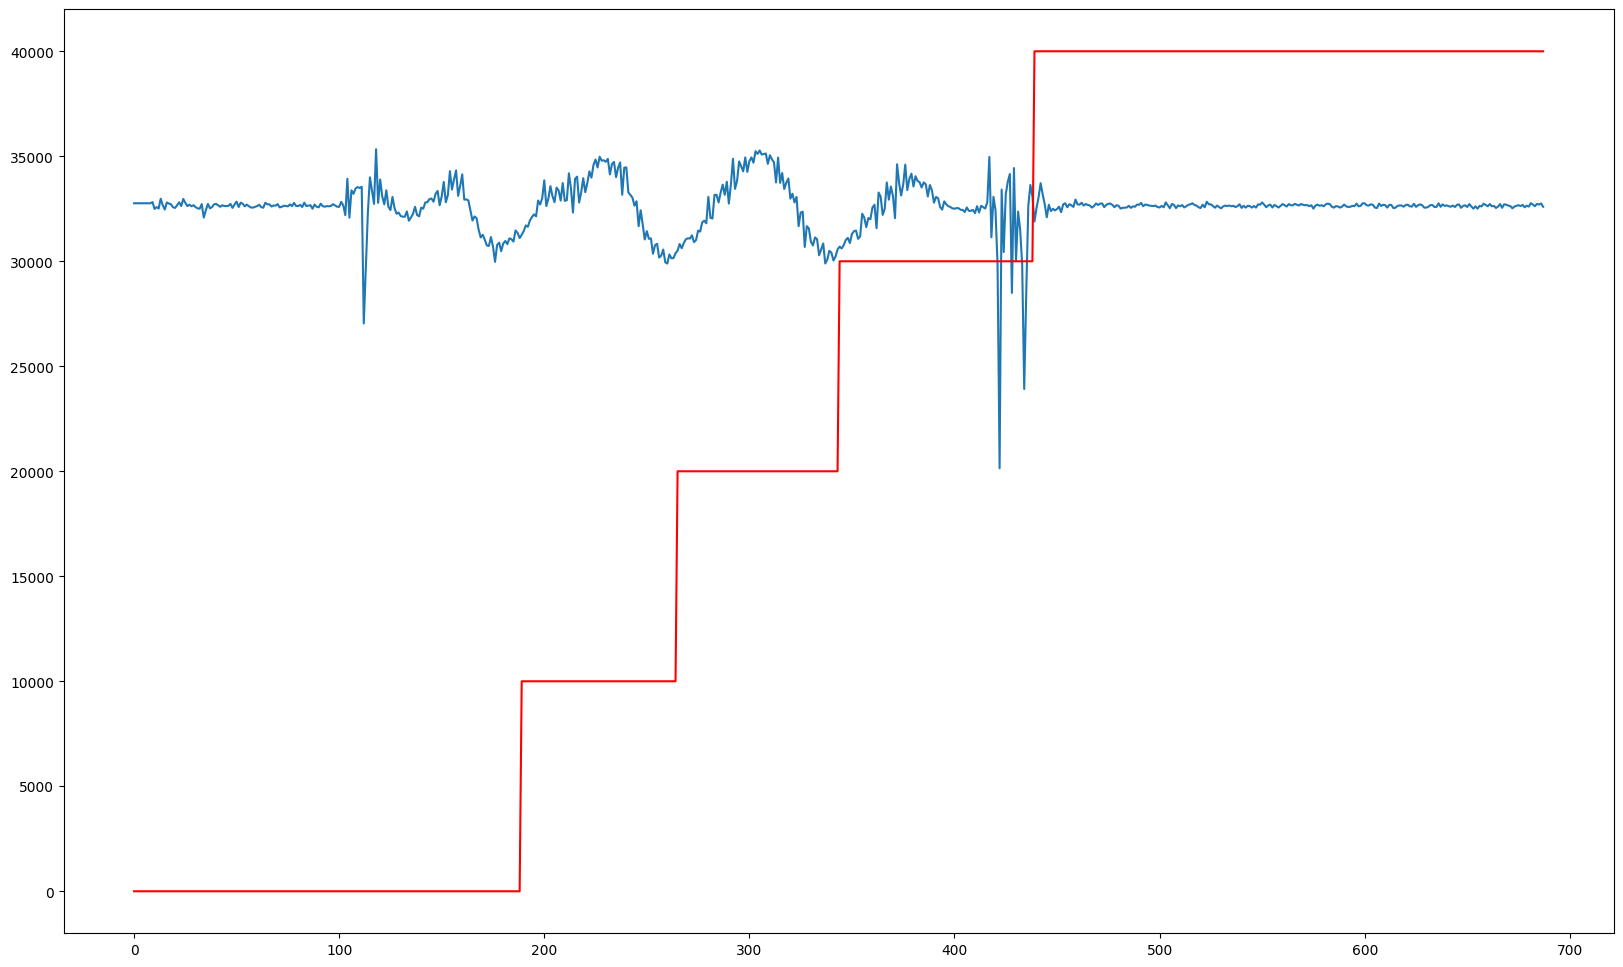

In [12]:
import matplotlib.pyplot as plt
# import pandas as pd

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1,1,1)

ax.plot(y_arr)
ax.plot(x_arr, color='r')
plt.show()